In [87]:
import sys
import pandas as pd
import sklearn
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

In [88]:
!unzip "/content/drive/MyDrive/Arabic.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train images 13440x32x32/train/id_5500_label_16.png  
  inflating: train images 13440x32x32/train/id_5501_label_16.png  
  inflating: train images 13440x32x32/train/id_5502_label_16.png  
  inflating: train images 13440x32x32/train/id_5503_label_16.png  
  inflating: train images 13440x32x32/train/id_5504_label_16.png  
  inflating: train images 13440x32x32/train/id_5505_label_17.png  
  inflating: train images 13440x32x32/train/id_5506_label_17.png  
  inflating: train images 13440x32x32/train/id_5507_label_17.png  
  inflating: train images 13440x32x32/train/id_5508_label_17.png  
  inflating: train images 13440x32x32/train/id_5509_label_17.png  
  inflating: train images 13440x32x32/train/id_550_label_13.png  
  inflating: train images 13440x32x32/train/id_5510_label_17.png  
  inflating: train images 13440x32x32/train/id_5511_label_17.png  
  inflating: train images 13440x32x32/train/id_5512_label_17.png  
  inflating:

In [95]:
# Convert Labels from Excel file into Lists 
train_df = pd.read_csv("/content/csvTrainLabel 13440x1.csv")
test_df = pd.read_csv("/content/csvTestLabel 3360x1.csv")

train_labels = train_df.loc[:,"1"].tolist()
train_labels.insert(0,1)

test_labels = test_df.loc[:,"1"].tolist()
test_labels.insert(0,1)


In [94]:
file_walk = os.walk("/content/train images 13440x32x32")
result = [os.path.join(root, file) for root, dir, files in file_walk for file in files]
result = sorted(result)
result[4567]

'/content/train images 13440x32x32/train/id_2014_label_28.png'

In [96]:
train_labels_string = []
for i in range(len(train_labels)):
  train_labels_string.append(str(i+1) + ":" + str(train_labels[i]))
print(train_labels_string)
train_labels_string = sorted(train_labels_string)
print(train_labels_string)

train_labels_v2 = []
for i in range(len(train_labels_string)):
  train_labels_v2.append(int(train_labels_string[i].split(":")[1]))
train_labels = train_labels_v2
for i in range(len(train_labels)):
  train_labels[i] = train_labels[i] - 1
train_labels

['1:1', '2:1', '3:1', '4:1', '5:1', '6:1', '7:1', '8:1', '9:2', '10:2', '11:2', '12:2', '13:2', '14:2', '15:2', '16:2', '17:3', '18:3', '19:3', '20:3', '21:3', '22:3', '23:3', '24:3', '25:4', '26:4', '27:4', '28:4', '29:4', '30:4', '31:4', '32:4', '33:5', '34:5', '35:5', '36:5', '37:5', '38:5', '39:5', '40:5', '41:6', '42:6', '43:6', '44:6', '45:6', '46:6', '47:6', '48:6', '49:7', '50:7', '51:7', '52:7', '53:7', '54:7', '55:7', '56:7', '57:8', '58:8', '59:8', '60:8', '61:8', '62:8', '63:8', '64:8', '65:9', '66:9', '67:9', '68:9', '69:9', '70:9', '71:9', '72:9', '73:10', '74:10', '75:10', '76:10', '77:10', '78:10', '79:10', '80:10', '81:11', '82:11', '83:11', '84:11', '85:11', '86:11', '87:11', '88:11', '89:12', '90:12', '91:12', '92:12', '93:12', '94:12', '95:12', '96:12', '97:13', '98:13', '99:13', '100:13', '101:13', '102:13', '103:13', '104:13', '105:14', '106:14', '107:14', '108:14', '109:14', '110:14', '111:14', '112:14', '113:15', '114:15', '115:15', '116:15', '117:15', '118:15',

[17,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 19,
 12,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 20,
 20,
 20,
 13,
 20,
 20,
 20,
 20,
 20,
 21,
 21,
 21,
 21,
 21,
 13,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 13,
 22,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 24,
 13,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 25,
 25,
 25,
 13,
 25,
 25,
 25,
 25,
 25,
 26,
 26,
 26,
 26,
 26,
 13,
 26,
 26,
 26,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 13,
 27,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 14,
 12,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 14,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 14,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 14,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 14,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 14,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 14,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 14,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 15,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 15,
 13,
 13,
 13,
 14,
 14,
 14,


In [97]:
test_labels_string = []
for i in range(len(test_labels)):
  test_labels_string.append(str(i+1) + ":" + str(test_labels[i]))
test_labels_string = sorted(test_labels_string)
test_labels_v2 = []
for i in range(len(test_labels_string)):
  test_labels_v2.append(int(test_labels_string[i].split(":")[1]))
test_labels = test_labels_v2
for i in range(len(test_labels)):
  test_labels[i] = test_labels[i] - 1


In [98]:
from sklearn.datasets import load_files 
from keras.utils import np_utils

from keras.preprocessing import image
from tqdm import tqdm

train_dir = "/content/train images 13440x32x32"
test_dir = "/content/test images 3360x32x32"
batch_size = 32;
# IMPORTANT: Depends on what pre-trained model you choose, you will need to change these dimensions accordingly
img_height = 150; 
img_width = 150;

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels = train_labels,
    label_mode = "int",
    color_mode= "rgb",
    seed = 42,
    image_size= (img_height, img_width),
    batch_size = batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels = test_labels,
    label_mode = "int",
    color_mode= "rgb",
    seed = 42,
    image_size= (img_height, img_width),
    batch_size = batch_size
)

Found 13440 files belonging to 1 classes.
Found 3360 files belonging to 1 classes.


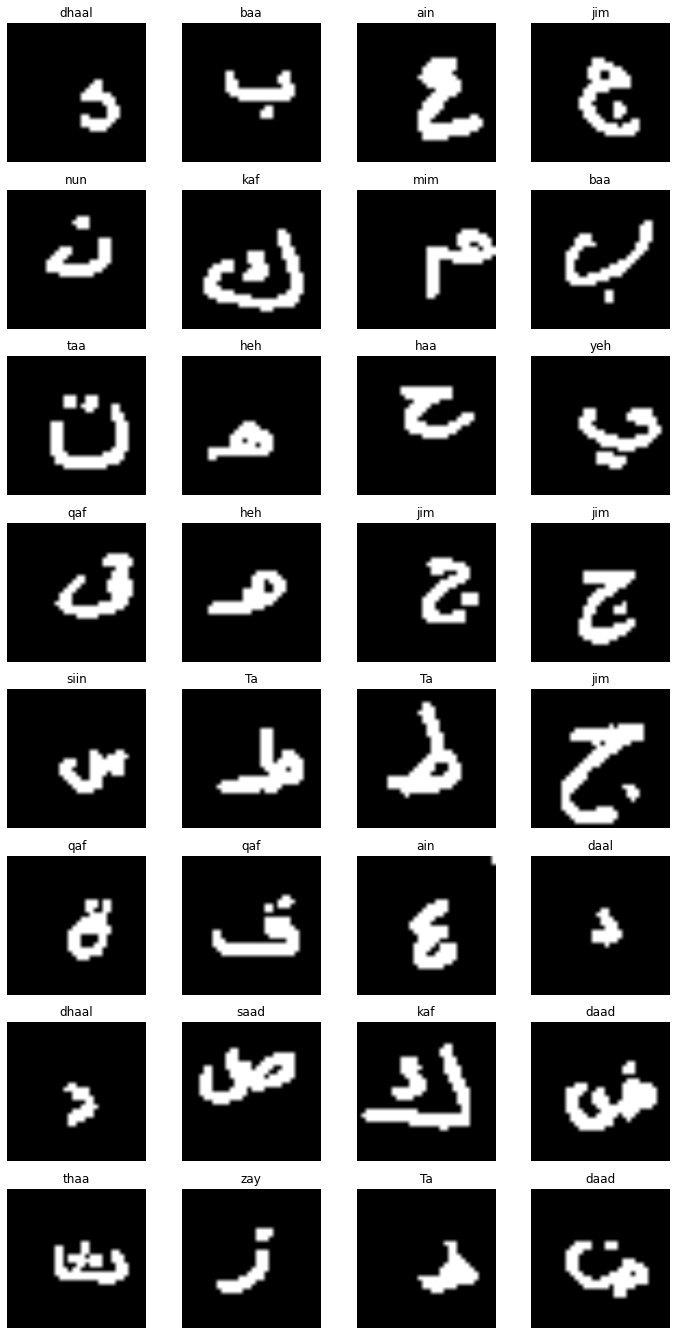

In [99]:
letters = ['alif', 'baa', 'taa', 'thaa', 'jim', 'haa', 'khaa', 'daal', 'dhaal', 'raa', 'zay',
              'siin', 'shiin', 'saad', 'daad', "Ta", "Dha", "ain", "ghain", "feh", "qaf", "kaf", "lam", "mim",
              "nun", "heh", "wa", "yeh"]
n_rows = 8
n_cols = 4
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for images, labels in train_ds.take(1):
    for i in range (n_rows*n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(letters[labels[i]], fontsize=12)
plt.subplots_adjust(wspace=.2, hspace=.2)

In [100]:
from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model_1 = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[150, 150, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.25),

    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.25),

    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(units=512, activation='relu'),
    keras.layers.Dropout(0.15),
    keras.layers.Dense(units=512, activation='relu'),
    keras.layers.Dropout(0.15),
    keras.layers.Dense(units=28, activation='softmax'),
])

In [104]:
from keras import backend as K
optimizer = keras.optimizers.Nadam(lr = 0.001)
model_1.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
model_1.fit(train_ds, epochs=5, validation_data= test_ds, callbacks=[model_checkpoint_callback])
K.set_value(model_1.optimizer.learning_rate, 0.0005)
model_1.fit(train_ds, epochs=3, validation_data= test_ds, callbacks=[model_checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
420/420 [==============================] - 111s 230ms/step - loss: 0.0856 - accuracy: 0.9740 - val_loss: 0.3113 - val_accuracy: 0.9060
Epoch 2/5
420/420 [==============================] - 96s 228ms/step - loss: 0.0627 - accuracy: 0.9785 - val_loss: 0.1822 - val_accuracy: 0.9494
Epoch 3/5
420/420 [==============================] - 96s 227ms/step - loss: 0.0505 - accuracy: 0.9836 - val_loss: 0.1950 - val_accuracy: 0.9467
Epoch 4/5
420/420 [==============================] - 96s 228ms/step - loss: 0.0323 - accuracy: 0.9901 - val_loss: 0.2920 - val_accuracy: 0.9280
Epoch 5/5
420/420 [==============================] - 96s 228ms/step - loss: 0.0275 - accuracy: 0.9919 - val_loss: 0.2193 - val_accuracy: 0.9438
Epoch 1/3
420/420 [==============================] - 96s 228ms/step - loss: 0.0126 - accuracy: 0.9967 - val_loss: 0.1809 - val_accuracy: 0.9577
Epoch 2/3
420/420 [==============================] - 96s 228ms/step - loss: 0.0075 - accuracy: 0.9985 - val_loss: 0.1570 - val_accuracy

In [105]:
model_1.load_weights(checkpoint_filepath)

In [106]:
model_1.evaluate(test_ds)

105/105 [==============================] - 7s 69ms/step - loss: 0.1570 - accuracy: 0.9634


[0.15695983171463013, 0.9633928537368774]

In [107]:
model_1.save("ArabicCNN")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ArabicCNN/assets
